# 成长因子

## 基本逻辑

成长因子一般捕捉的是企业营收, 利润或者现金流的变动. 成长性是股票内在价值的一部分, 一个企业当前的价值可以看做企业未来现金流按照风险调整的贴现率贴现加总后的现值. 一个简单的现金流贴现模型的例子为戈登股利增长模型(Gordon Growth Model), 又称为“股利贴息不变增长模型”, 该模型考虑的现金流是股利, 通过计算公司预期未来支付给股东的股利现值, 来确定股票的内在价值, 它相当于未来股利的永续流入. 不变增长模型有三个假定条件：
1. 股息的支付在时间上是永久性的。
2. 股息的增长速度是一个常数。
3. 模型中的贴现率大于股息增长率。
$$
V=\sum\limits^{\infty}_{t=1}\frac{D_t}{(1+r)^t}=D_0\frac{1+g}{r-g}=\frac{D_1}{r-g}
$$
其中, $D_t$ 是第 t 期的预期股利, $g$ 是股利的增长率, $r$ 是风险调整的贴现率, 或资本成本(Cost of Capital). 在戈登模型中, 需要预测的是下一期股利及其年增长率, 而不是预计每一期的股利.

虽然上述模型在应用中很难使用, 但其表明了增长率和股票内在价值的关系: 高成长性的股票内在价值更大. 一个企业如果它在营收, 利润, 以及现金流方面的成长性高于平均水平, 这说明该企业的市场份额不断增长, 有较强的竞争优势.

**GSCORE**

为了选择到更好的成长股, 类似于价值股的 FSCORE, Partha Mohanram(2005) 提出了筛选成长股的八条准则:
* ROA(Return on Asset): ROA 高于行业中位数
* 经营性现金流(Operating Cash Flow): 经营性现金流资产比高于行业中位数
* 盈利质量(Earnings Quality): 经营性现金流比净利润高
* 盈利变动(Earnings Variability): 过去 3-5 年 ROA 的方差低于行业中位数
* 成长稳定性(Growth Stability): 过去 3-5 年营收增长率的方差低于行业中位数
* 研发强度(R&D Intensity): 研发费用占总资产的比例高于行业中位数
* 资本支出(Capital Expenditure): 资本支出占总资产的比例高于行业中位数
* 广告强度(Advertising Intensity): 广告成本占总资产的比例高于行业中位数

每通过一条准则记 1 分, 不通过记 0 分, 则将得分加总即为 GSCORE, GSCORE 在 6 以上为好股票, 0~1 为差股票.

## 成长因子库

In [1]:
# coding=utf-8
import time
import sys
import os
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sys.path.append("C:\\Users\\hushuntai\\svn\\python")

from IPython.display import display
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdate
from tqdm import tqdm_notebook

pd.set_option("max_rows", None, "max_colwidth", 1000)
FactorInfo = pd.read_csv(".\\csv\\成长因子.csv", header=0, index_col=0, encoding="utf-8")
display(FactorInfo)

,因子描述,排序方向,数据类型
因子名称,,,
Gr_5Y_Sale,"过去5年年报营业收入的历史增长率, 以回归方式计算",降序,double
Gr_5Y_Earning,"过去5年年报净利润的历史增长率, 以回归方式计算",降序,double
Gr_5Y_OCF,"过去5年年报经营活动产生的现金流量净额的历史增长率, 以回归方式计算",降序,double
Gr_3Y_Sale,"过去3年年报营业收入的历史增长率, 以回归方式计算",降序,double
Gr_3Y_Earning,"过去3年年报净利润的历史增长率, 以回归方式计算",降序,double
Gr_3Y_OCF,"过去3年年报经营活动产生的现金流量净额的历史增长率, 以回归方式计算",降序,double
Gr_1Y_Sale,营业收入_最新年报的同比增长率,降序,double
Gr_1Y_Earning,净利润_最新年报的同比增长率,降序,double
Gr_1Y_OCF,经营活动产生的现金流量净额_最新年报的同比增长率,降序,double


说明：
* 同比增长率: 取前可见的最新财报计算的因子值和去年同期财报计算的因子值来计算增长率, 即: (最新财报计算的因子值 - 去年同期财报计算的因子值) / abs(去年同期财报计算的因子值), abs 表示取绝对值;
* 回归方式计算增长率: 以 3 年为例，表示以过去 3 年年报数据同 $[0, 1, 2]$ 进行回归, 取回归系数除以过去 3 年年报数据的平均值;
* FY0: 最近预测年度分析师预测值, 假设当前时点可见的最新年报是 2017 年年报，取分析师对 2018 年年报的一致预期值
* FY1: 最近预测年度下一年度分析师预测值, 假设当前时点可见的最新年报是 2017 年年报，取分析师对 2019 年年报的一致预期值

## 因子测试

由于大多数成长因子涉及公司的财务数据, 而财务报表每个季度发布一次, 季度内因子值的变化仅仅依赖于股票价格的变动, 所以因子的预测期不宜过短, 这里以月度为预测期. 

下面从 IC, Fama-MacBeth 回归, 行业分布以及因子间相关性对成长类因子进行测试:

==========历史回测==========
1. 初始化耗时 : 9.89
2. 循环计算

100%|████████████████████████████████████████| 132/132 [02:42<00:00,  1.23s/it]


耗时 : 162.76
3. 结果生成耗时 : 0.55
总耗时 : 173.21


,平均值,标准差,最小值,最大值,IC_IR,t统计量,平均股票数,IC×Sqrt(N),有效期数
Ac_Q_Earning,1.51%,3.16%,-6.82%,12.81%,0.4783,5.47,2000.17,0.68,131
Ac_Q_OCF,0.11%,2.81%,-6.69%,6.52%,0.0399,0.46,1999.16,0.05,131
Ac_Q_OpEarning,1.29%,2.98%,-5.85%,10.70%,0.4331,4.96,2000.17,0.58,131
Ac_Q_Sale,1.20%,2.79%,-7.69%,8.42%,0.4291,4.91,1988.03,0.53,131
Capex2Sales,-0.38%,6.41%,-14.58%,13.50%,-0.0592,-0.68,2045.13,-0.17,131
Gr_1Y_Earning,-0.89%,6.16%,-19.11%,15.01%,-0.1440,-1.65,2049.87,-0.40,131
Gr_1Y_OCF,0.46%,3.69%,-8.94%,9.00%,0.1243,1.42,2049.45,0.21,131
Gr_1Y_Sale,-0.80%,7.42%,-18.73%,17.31%,-0.1085,-1.24,2046.15,-0.36,131
Gr_3Y_Earning,-1.27%,6.18%,-21.24%,20.31%,-0.2050,-2.35,2050.02,-0.57,131
Gr_3Y_OCF,0.41%,3.33%,-8.95%,7.74%,0.1223,1.40,2049.92,0.18,131

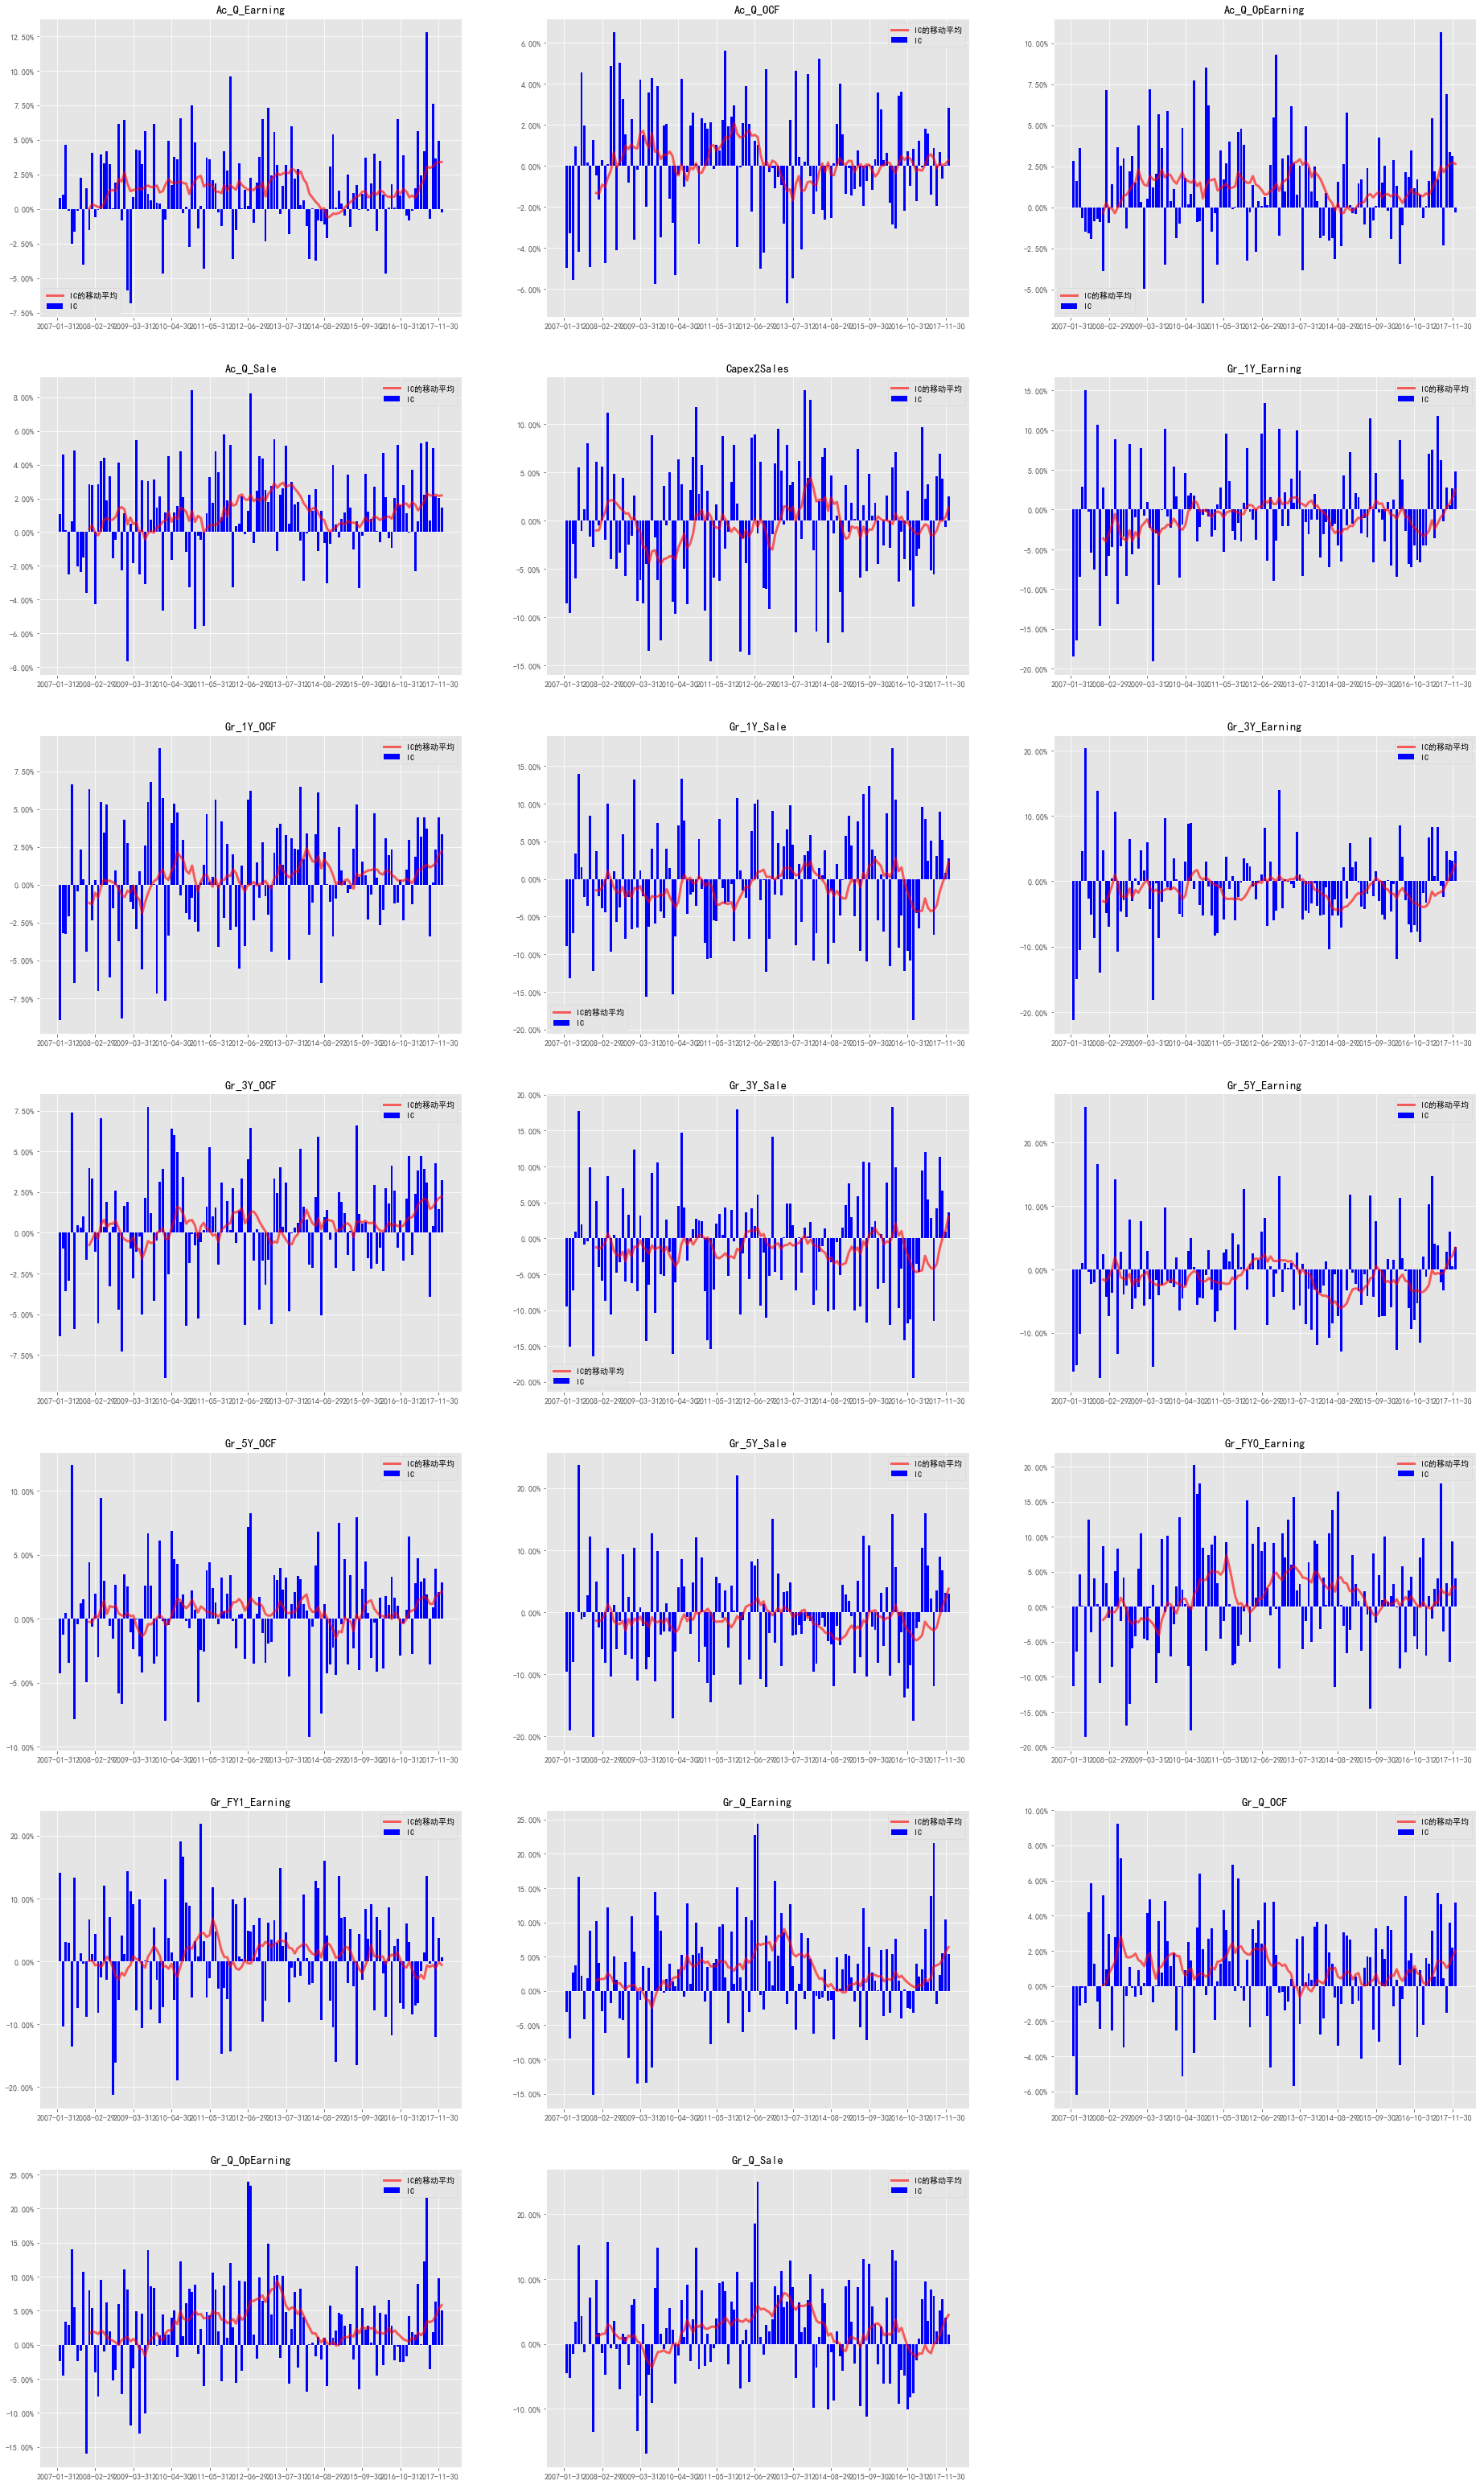
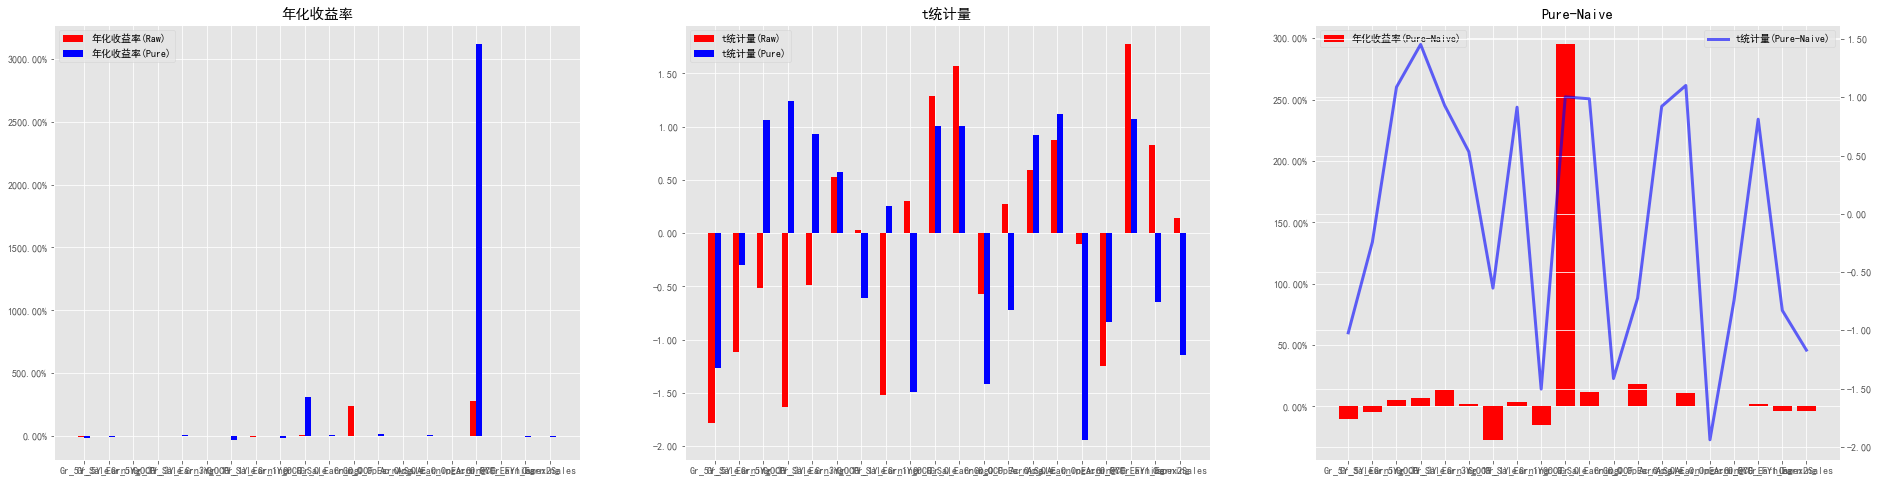
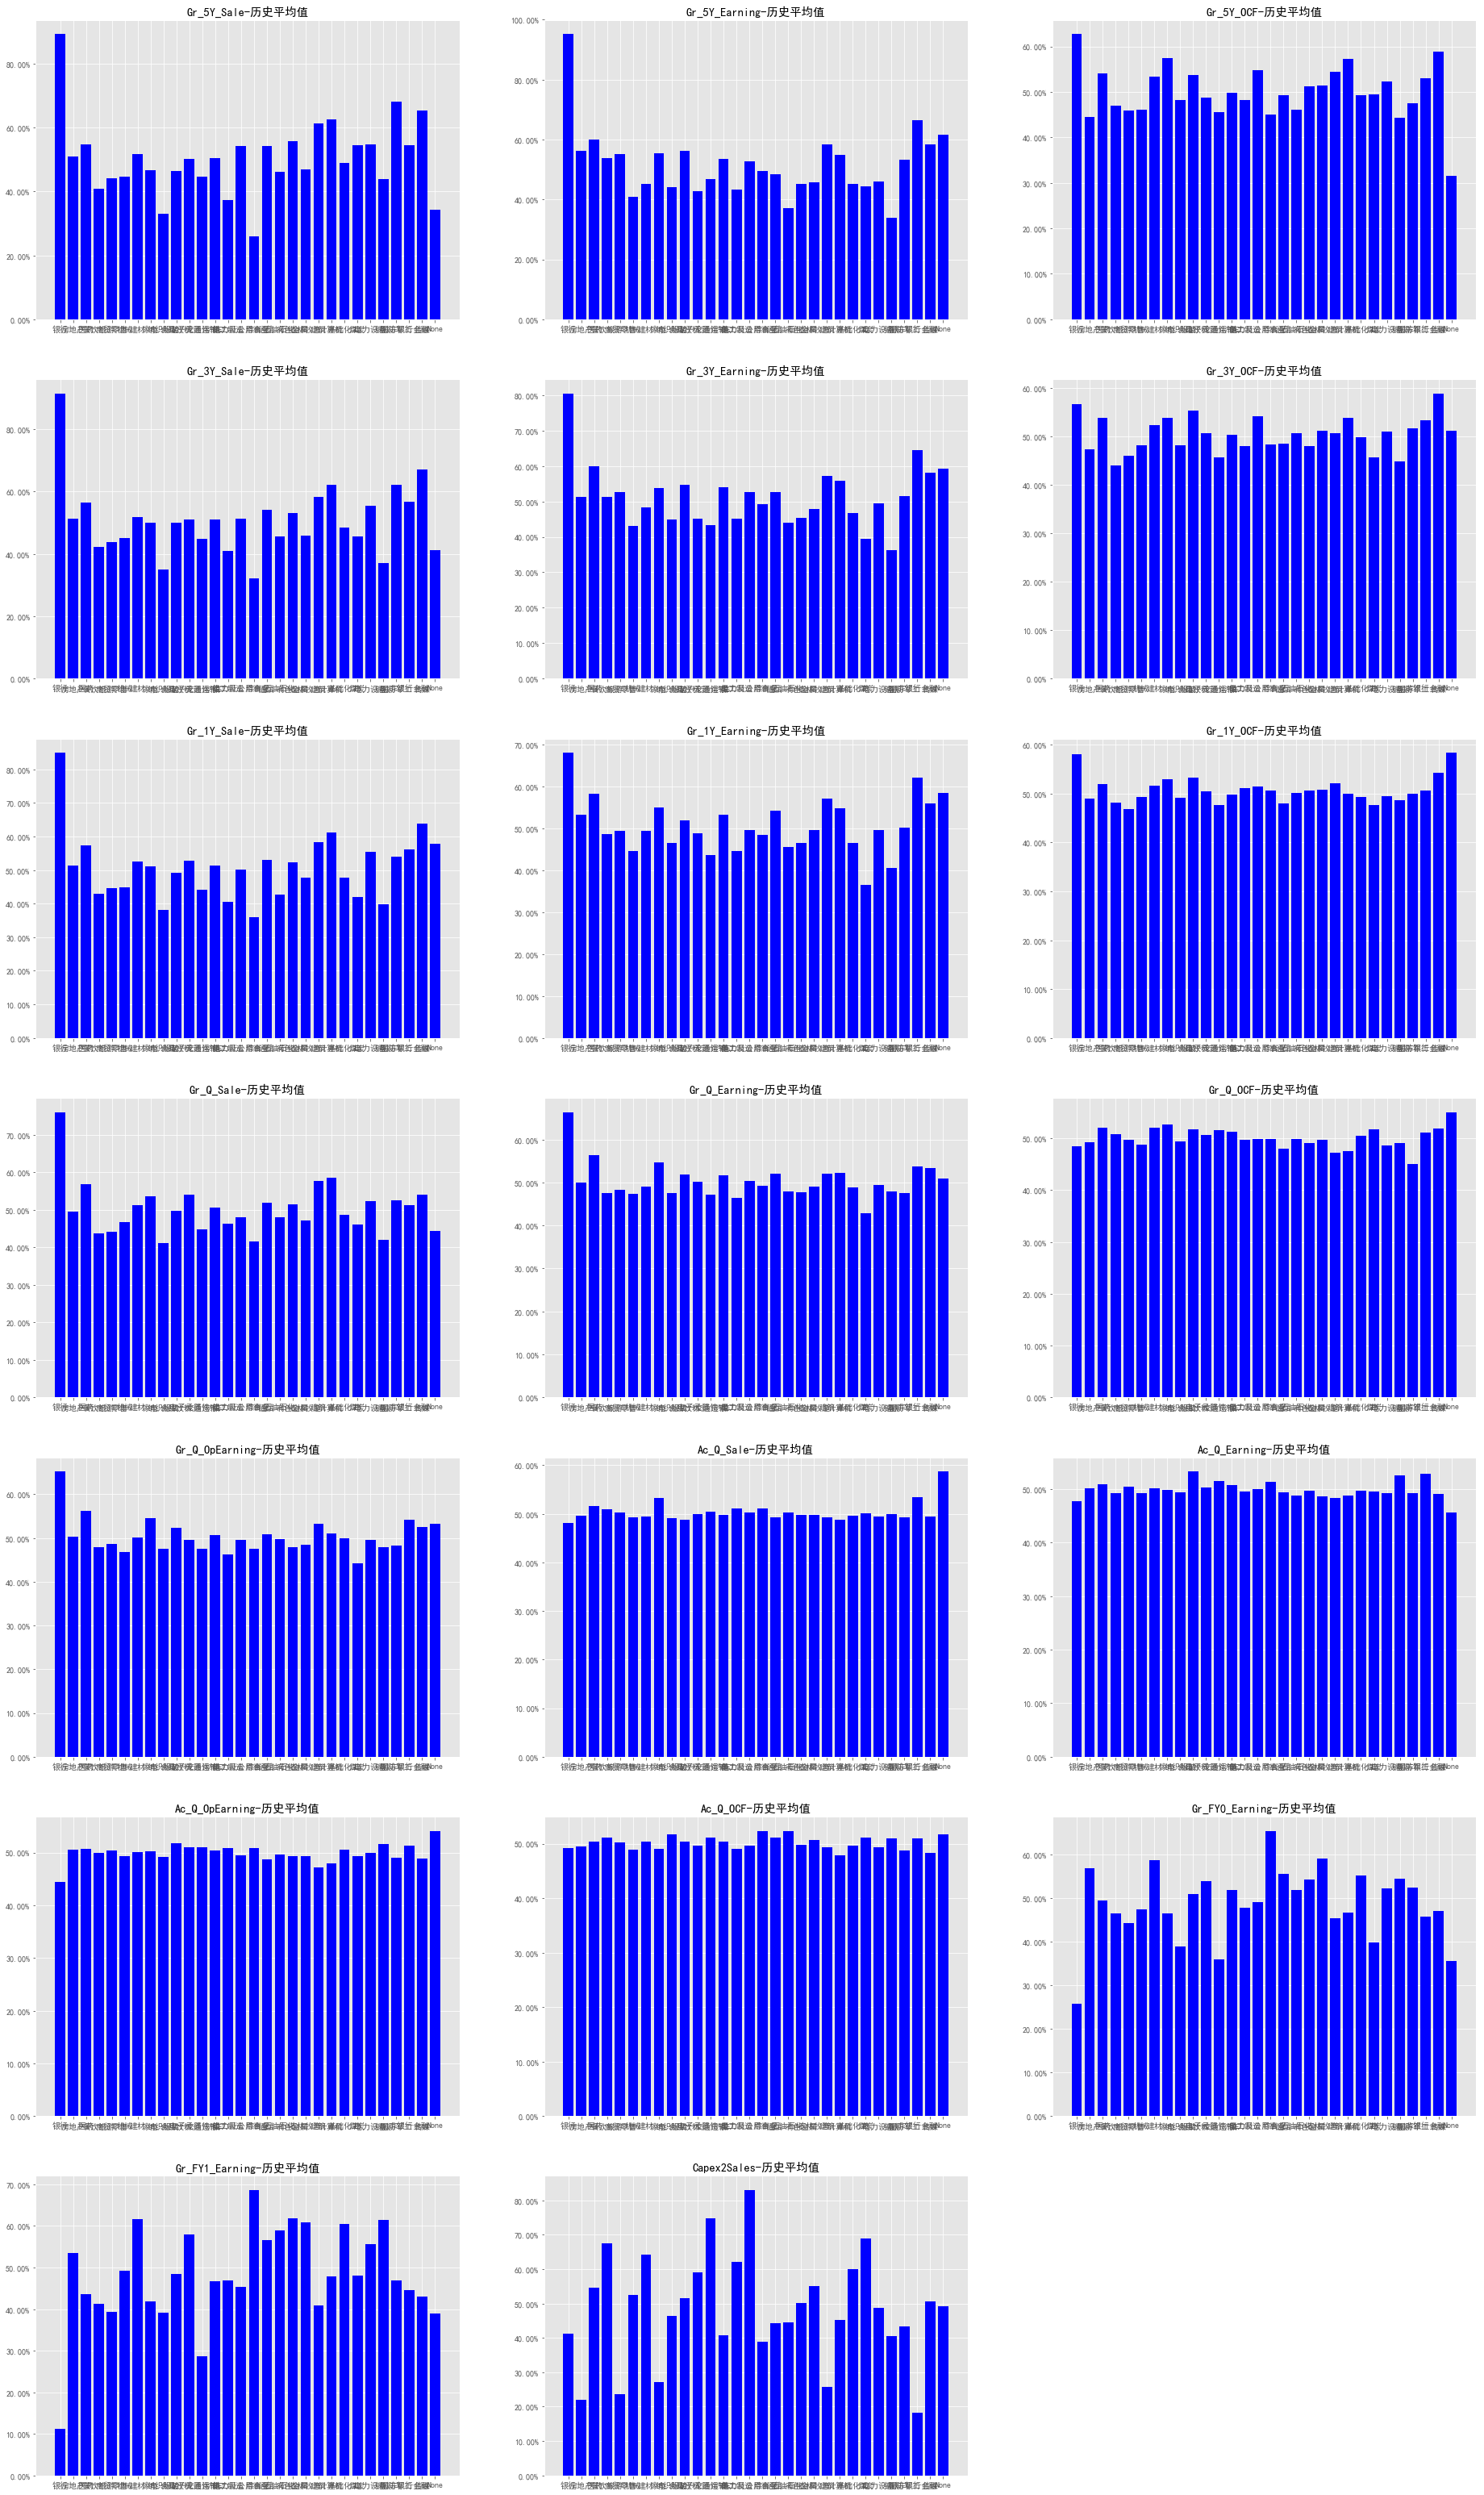

In [2]:
if __name__=='__main__':
    import matplotlib
    matplotlib.pyplot.ioff()
    import QuantStudio.api as QS
    
    # 创建因子库
    HDB = QS.FactorDB.HDF5DB()
    HDB.connect()
    
    # 创建自定义因子表
    MainFT = QS.FactorDB.CustomFT("MainFT")
    ElementaryFT = HDB.getTable("ElementaryFactor")
    DTs = ElementaryFT.getDateTime(ifactor_name="复权收盘价", start_dt=dt.datetime(2007, 1, 1), end_dt=dt.datetime(2018, 1, 1))
    MonthLastDTs = QS.Tools.DateTime.getMonthLastDateTime(DTs)
    FactorNames = FactorInfo.index.tolist()
    MainFT.addFactors(factor_table=ElementaryFT, factor_names=["复权收盘价", "中信行业", "是否在市"], args={})
    ValueFT = HDB.getTable("StyleGrowthFactor")
    Mask = (ElementaryFT.getFactor("是否在市")==1)
    Factors = [QS.FactorDB.FactorTools.standardizeZScore(ValueFT.getFactor(iFactorName), mask=Mask, factor_name=iFactorName) for iFactorName in ValueFT.FactorNames]# 截面标准化处理
    MainFT.addFactors(factor_list=Factors)
    MainFT.setDateTime(MonthLastDTs)
    MainFT.setID(ElementaryFT.getID(ifactor_name="复权收盘价"))
    
    # 创建回测模型
    Model = QS.BackTest.BackTestModel()
    # --------因子测试模块--------
    # IC 测试
    iModule = QS.BackTest.SectionFactor.IC(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["排序方向"] = FactorInfo["排序方向"].loc[FactorNames].to_dict()
    iModule["价格因子"] = "复权收盘价"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    # Fama-MacBeth 回归
    iModule = QS.BackTest.SectionFactor.FamaMacBethRegression(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["价格因子"] = "复权收盘价"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    # 因子值的行业分布
    iModule = QS.BackTest.SectionFactor.IndustryDistribution(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["行业因子"] = "中信行业"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    # 因子相关性
    iModule = QS.BackTest.SectionFactor.SectionCorrelation(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["排序方向"] = FactorInfo["排序方向"].loc[FactorNames].to_dict()
    iModule["计算时点"] = MonthLastDTs
    iModule["相关性算法"] = ["spearman"]
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    
    # 运行模型
    TestDateTimes = MainFT.getDateTime()
    Model.run(dts=TestDateTimes)
    
    # 查看结果
    display(Model)

从 IC 来看, 部分成长因子有一定的选股能力; 从因子值的行业分布来看, 行业因子在行业上的分布相对均匀, 下面我们测试其行业调整的 IC, 从结果看, 相比于调整前, 其选股能力的提升幅度不明显, 这也和其行业分布的无偏性吻合.

==========历史回测==========
1. 初始化耗时 : 2.69
2. 循环计算

100%|████████████████████████████████████████| 132/132 [02:40<00:00,  1.22s/it]


耗时 : 160.57
3. 结果生成耗时 : 0.09
总耗时 : 163.36


,平均值,标准差,最小值,最大值,IC_IR,t统计量,平均股票数,IC×Sqrt(N),有效期数
Ac_Q_Earning,1.44%,2.94%,-6.51%,9.78%,0.4891,5.60,2000.17,0.64,131
Ac_Q_OCF,0.07%,2.74%,-6.35%,5.75%,0.0271,0.31,1999.16,0.03,131
Ac_Q_OpEarning,1.17%,2.78%,-6.58%,9.10%,0.4228,4.84,2000.17,0.53,131
Ac_Q_Sale,0.97%,2.38%,-6.92%,7.17%,0.4070,4.66,1988.03,0.43,131
Capex2Sales,-0.18%,4.47%,-11.11%,9.93%,-0.0400,-0.46,2045.13,-0.08,131
Gr_1Y_Earning,-0.75%,5.46%,-18.90%,13.04%,-0.1368,-1.57,2049.87,-0.34,131
Gr_1Y_OCF,0.65%,3.12%,-8.54%,7.62%,0.2099,2.40,2049.45,0.30,131
Gr_1Y_Sale,-0.22%,5.85%,-16.76%,12.48%,-0.0379,-0.43,2046.15,-0.10,131
Gr_3Y_Earning,-0.96%,5.52%,-18.89%,18.81%,-0.1732,-1.98,2050.02,-0.43,131
Gr_3Y_OCF,0.55%,2.78%,-6.35%,7.51%,0.1980,2.27,2049.92,0.25,131

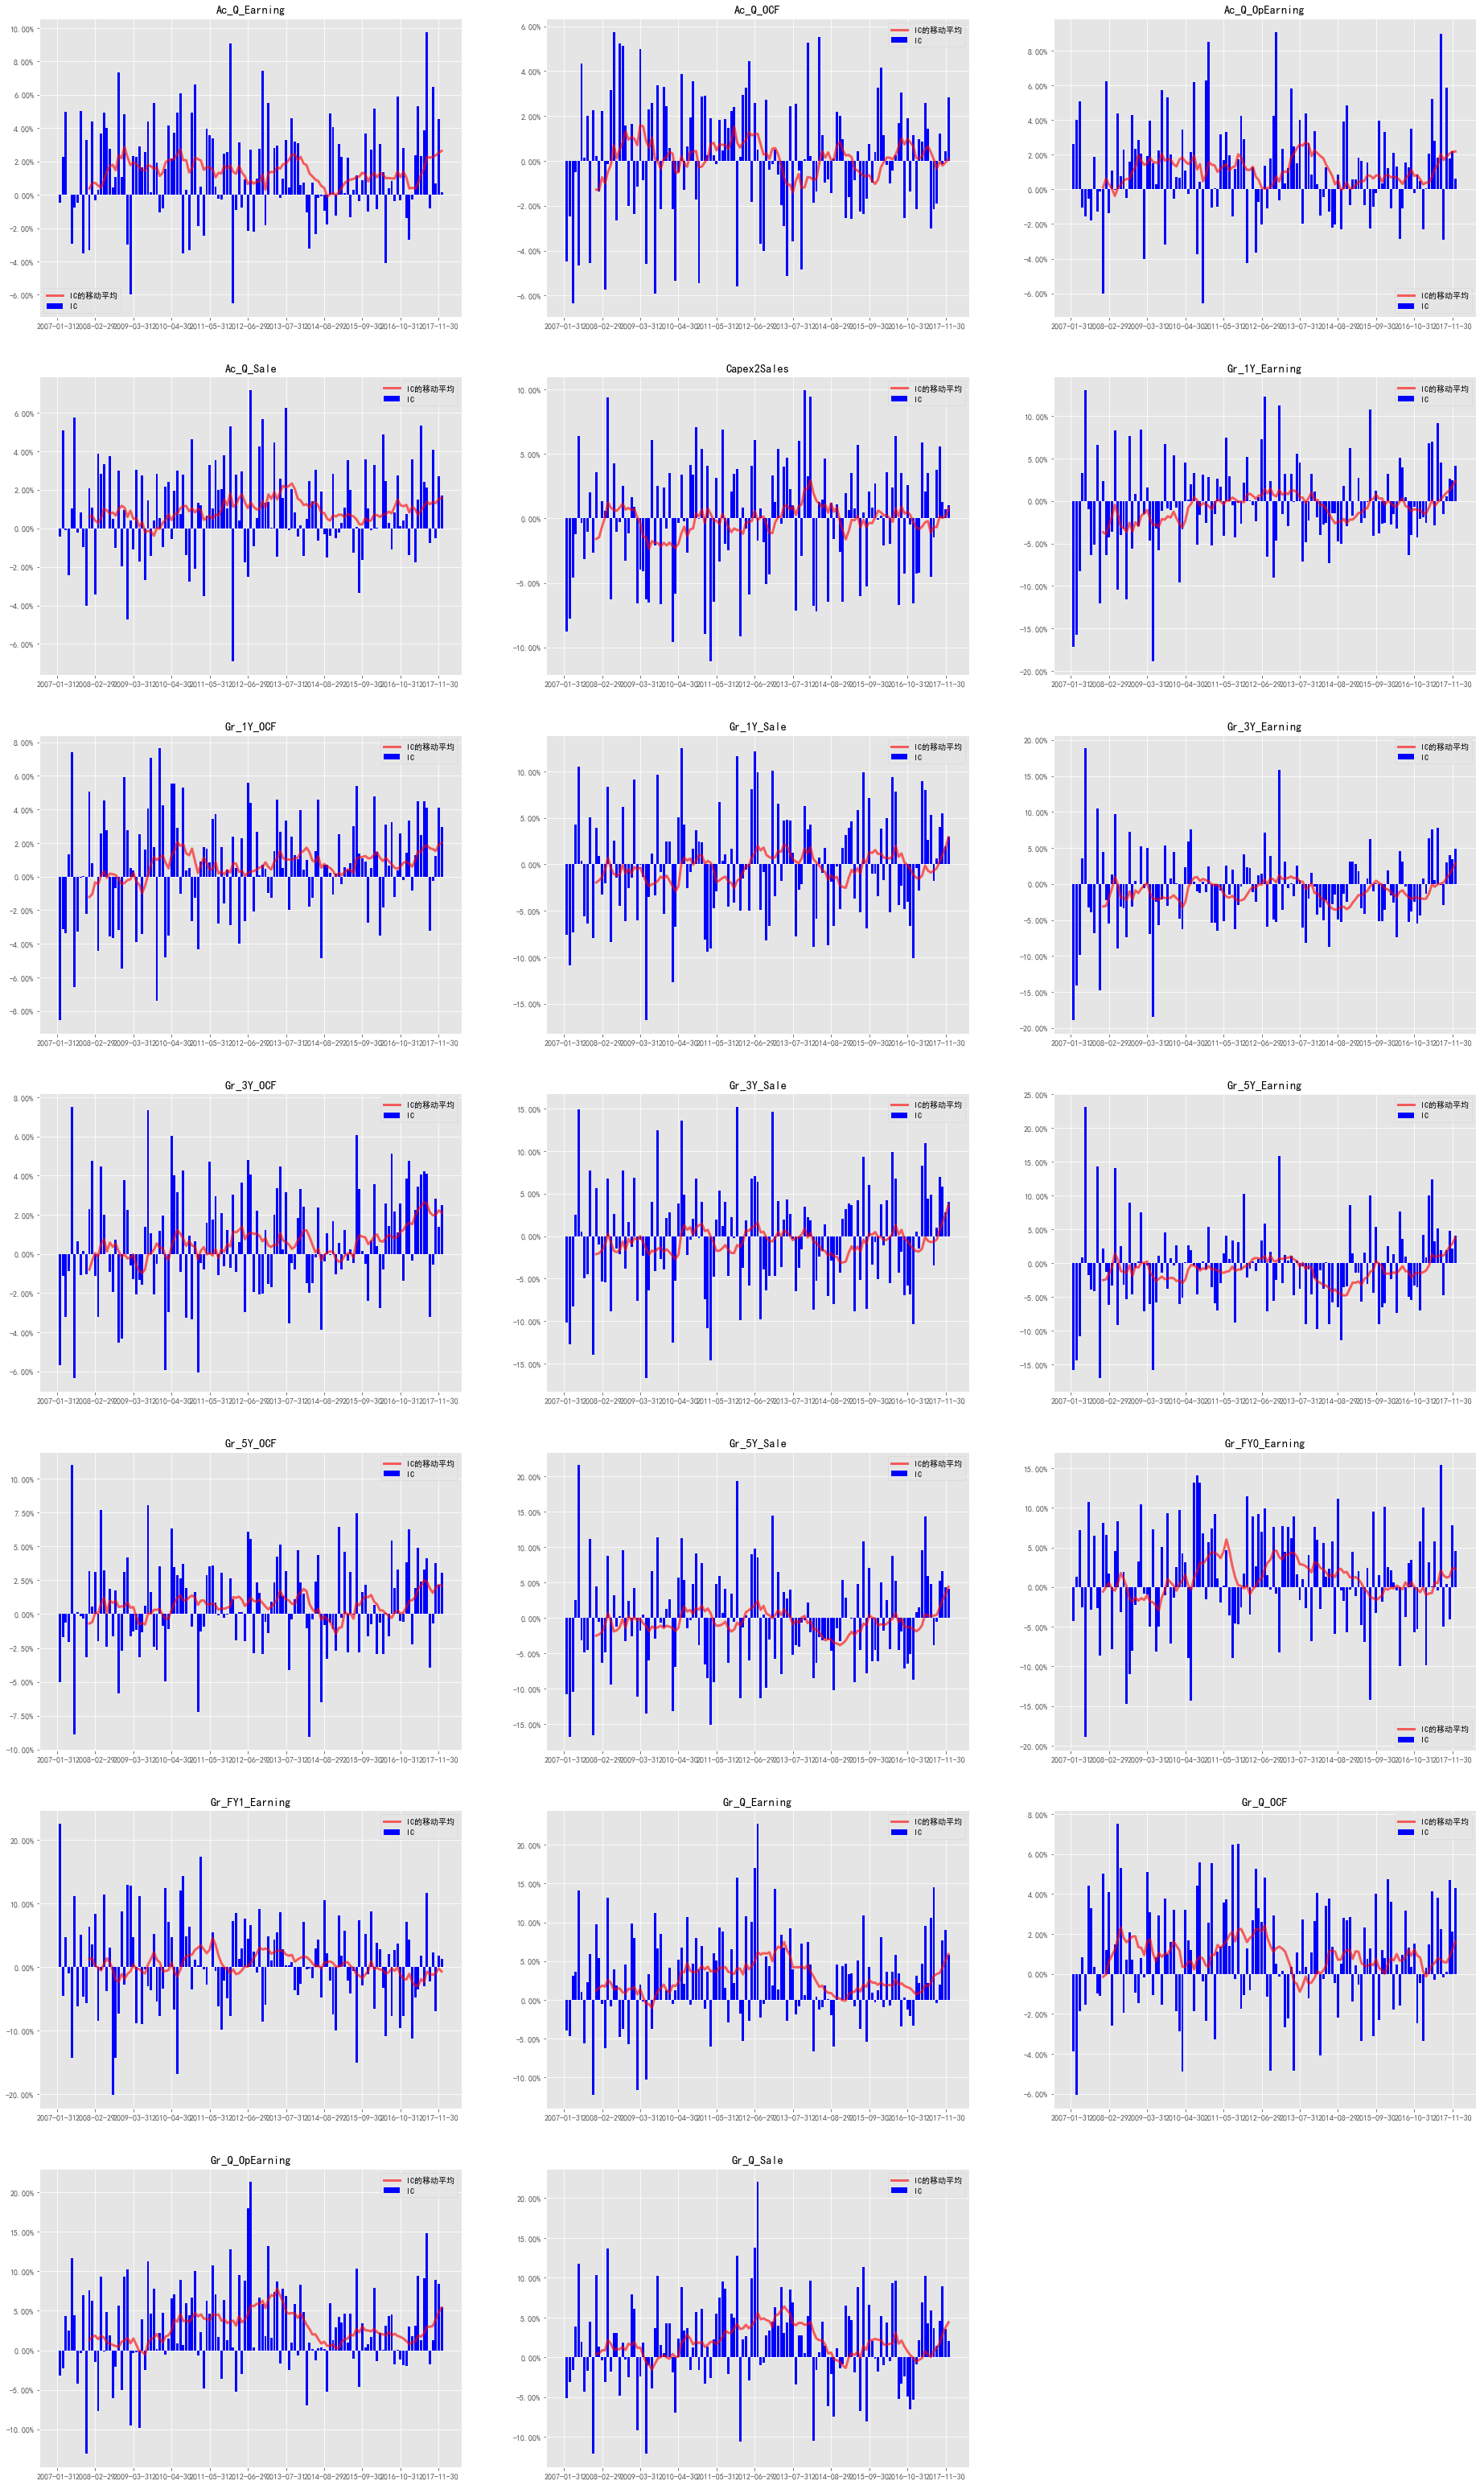

In [3]:
if __name__=='__main__':
    # 创建回测模型
    Model = QS.BackTest.BackTestModel()
    # --------因子测试模块--------
    # IC 测试
    iModule = QS.BackTest.SectionFactor.IC(factor_table=MainFT)
    iModule["测试因子"] = FactorNames
    iModule["排序方向"] = FactorInfo["排序方向"].loc[FactorNames].to_dict()
    iModule["价格因子"] = "复权收盘价"
    iModule["行业因子"] = "中信行业"
    iModule["计算时点"] = MonthLastDTs
    iModule["筛选条件"] = "@是否在市==1"
    Model.Modules.append(iModule)
    
    # 运行模型
    TestDateTimes = MainFT.getDateTime()
    Model.run(dts=TestDateTimes)
    
    # 查看结果
    display(Model)

整体上看, 对 A 股比较有效的成长因子为基于单季度财务数据计算的各个成长因子.